In [2]:
# Import packages
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler # standard score aka z score
from sklearn.preprocessing import LabelEncoder #Encode target labels with value between 0 and n_classes-1.
from sklearn.preprocessing import LabelBinarizer
# returns vector when there are two classes, likely means have to reduce dimension first then use....
#https://www.youtube.com/watch?v=63IN-qnI2YI
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('resale-flat-prices-based-on-approval-date-1990-1999.csv')

In [4]:
df[df['flat_type'] == '4 ROOM']

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
104,1990-01,ANG MO KIO,4 ROOM,211,ANG MO KIO AVE 3,04 TO 06,81.0,NEW GENERATION,1977,80000
105,1990-01,ANG MO KIO,4 ROOM,209,ANG MO KIO AVE 3,07 TO 09,91.0,NEW GENERATION,1977,72000
106,1990-01,ANG MO KIO,4 ROOM,231,ANG MO KIO AVE 3,04 TO 06,92.0,NEW GENERATION,1977,72000
107,1990-01,ANG MO KIO,4 ROOM,308,ANG MO KIO AVE 1,10 TO 12,92.0,NEW GENERATION,1976,86000
108,1990-01,ANG MO KIO,4 ROOM,254,ANG MO KIO AVE 4,10 TO 12,97.0,NEW GENERATION,1977,72000
...,...,...,...,...,...,...,...,...,...,...
287163,1999-12,YISHUN,4 ROOM,605,YISHUN ST 61,07 TO 09,84.0,SIMPLIFIED,1988,206500
287164,1999-12,YISHUN,4 ROOM,607,YISHUN ST 61,01 TO 03,85.0,SIMPLIFIED,1987,200000
287165,1999-12,YISHUN,4 ROOM,408,YISHUN AVE 6,07 TO 09,84.0,SIMPLIFIED,1988,187000
287166,1999-12,YISHUN,4 ROOM,423,YISHUN AVE 11,07 TO 09,84.0,SIMPLIFIED,1988,193000


In [5]:
#df.dropna()

In [6]:
type(df['month'].iloc[0])

str

In [7]:
df['month']=pd.to_datetime(df['month'])
df['month'].head()

0   1990-01-01
1   1990-01-01
2   1990-01-01
3   1990-01-01
4   1990-01-01
Name: month, dtype: datetime64[ns]

In [8]:
time = df['month'].iloc[0]
time.dayofweek

0

In [9]:
df['Year'] = df['month'].apply(lambda x: x.year)
df['Month'] = df['month'].apply(lambda y: y.month)
df['Day of Week'] = df['month'].apply(lambda z: z.dayofweek)

In [10]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [11]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Year,Month,Day of Week
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000,1990,1,Mon
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000,1990,1,Mon
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000,1990,1,Mon
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000,1990,1,Mon
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200,1990,1,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287195,1999-12-01,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000,1999,12,Wed
287196,1999-12-01,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000,1999,12,Wed
287197,1999-12-01,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000,1999,12,Wed
287198,1999-12-01,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000,1999,12,Wed


Text(0.5, 1.0, 'resale volume for 1990-1999 by day')

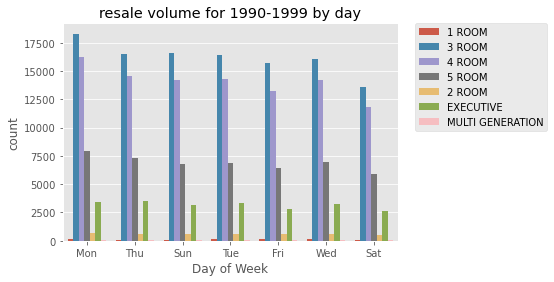

In [12]:
sns.countplot(x='Day of Week',data=df,hue='flat_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('resale volume for 1990-1999 by day')

Text(0.5, 1.0, 'resale volume for 1990-1999 by day')

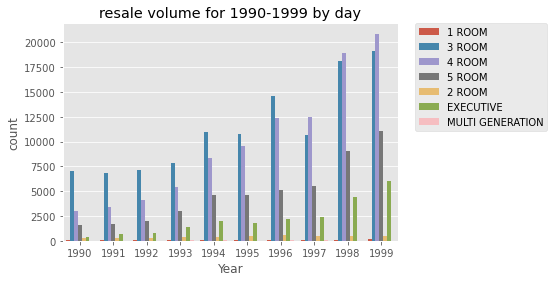

In [13]:
sns.countplot(x='Year',data=df,hue='flat_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('resale volume for 1990-1999 by day')

In [14]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price,Year,Month
count,287200.000000,287200.000000,287200.000000,287200.000000,287200.000000
mean,93.351439,1983.206741,219541.850313,1995.915066,6.606536
std,27.361839,6.085734,128144.384286,2.674011,3.434131
min,28.000000,1967.000000,5000.000000,1990.000000,1.000000
25%,68.000000,1979.000000,127000.000000,1994.000000,4.000000
50%,91.000000,1984.000000,195000.000000,1996.000000,7.000000
75%,113.000000,1987.000000,298000.000000,1998.000000,10.000000
max,307.000000,1997.000000,900000.000000,1999.000000,12.000000


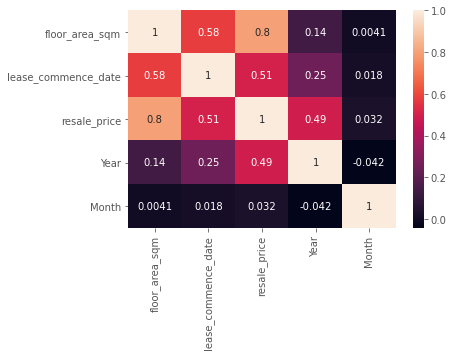

In [15]:
a = df.corr()
sns.heatmap(a,annot = True)

In [16]:
a

,floor_area_sqm,lease_commence_date,resale_price,Year,Month
floor_area_sqm,1.000000,0.578498,0.797008,0.139423,0.004093
lease_commence_date,0.578498,1.000000,0.505054,0.252881,0.017654
resale_price,0.797008,0.505054,1.000000,0.491466,0.032373
Year,0.139423,0.252881,0.491466,1.000000,-0.042002
Month,0.004093,0.017654,0.032373,-0.042002,1.000000


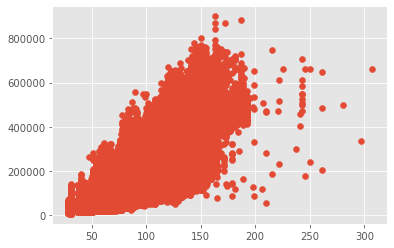

In [17]:
plt.scatter(df['floor_area_sqm'],df['resale_price'])

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

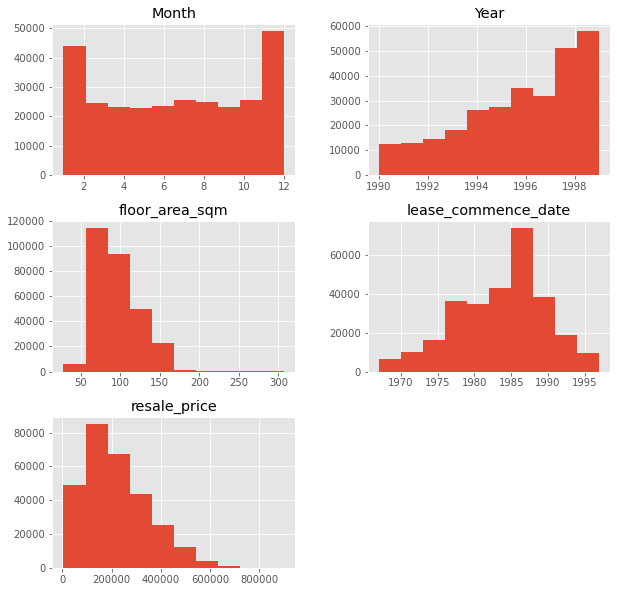

In [18]:
df.hist(figsize = (10, 10))
plt.tight_layout

1. If skewness is less than -1 or greater than 1, the distribution is skewed, but may or may not be considered high depending on the values.

2. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

3. If skewness is between -0.5 and 0.5, the distribution is approximately symmetrical.

In [19]:
df.skew()
#probably need log resale_price

floor_area_sqm         0.532423
lease_commence_date   -0.354458
resale_price           0.753530
Year                  -0.626341
Month                 -0.045162
dtype: float64

In [20]:
df['sqrt_resale_price'] = np.sqrt(df['resale_price'])
df['sqrt_floor_area_sqm'] = np.sqrt(df['floor_area_sqm'])
#Let's check skew values with transformation
print("\nskewness after transformation:\n")
print(df.skew())


skewness after transformation:

floor_area_sqm         0.532423
lease_commence_date   -0.354458
resale_price           0.753530
Year                  -0.626341
Month                 -0.045162
sqrt_resale_price      0.077342
sqrt_floor_area_sqm    0.256756
dtype: float64


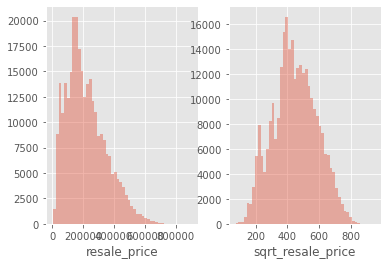

In [21]:
fig, ax = plt.subplots(1, 2) #to create 1 row 2 plot 
sns.distplot(df['resale_price'], kde = False, ax = ax[0])
sns.distplot(df['sqrt_resale_price'],  kde = False, ax = ax[1])

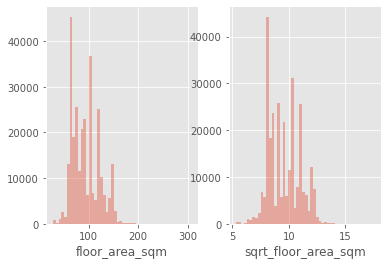

In [22]:
fig, ax = plt.subplots(1, 2) #to create 1 row 2 plot 
sns.distplot(df['floor_area_sqm'], kde = False, ax = ax[0])
sns.distplot(df['sqrt_floor_area_sqm'],  kde = False, ax = ax[1])

In [23]:
#copied to df1 while dropping transformed columns
df1 = df.drop(['resale_price', 'floor_area_sqm'], axis = 1)

In [24]:
df1.sample()

,month,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,Year,Month,Day of Week,sqrt_resale_price,sqrt_floor_area_sqm
100996,1995-09-01,HOUGANG,5 ROOM,408,HOUGANG AVE 10,01 TO 03,IMPROVED,1986,1995,9,Fri,583.095189,11.0


In [25]:
#conduct multi-class classification to predict flat_type using
#sqrt_resale_price & sqrt_floor_area_sqm

In [26]:
df.groupby('flat_type').size()

flat_type
1 ROOM                 827
2 ROOM                4140
3 ROOM              113106
4 ROOM               98521
5 ROOM               48206
EXECUTIVE            22121
MULTI GENERATION       279
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


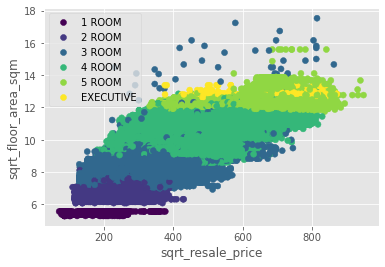

In [27]:
inv_name_dict = {'1 ROOM':1,'2 ROOM':2,
                 '3 ROOM':3,'4 ROOM':5,
                 '5 ROOM':5,'EXECUTIVE':6,
                 'MULTI GENERATION':7}
colors = [inv_name_dict[item] for item in df['flat_type']]

scatter = plt.scatter(df['sqrt_resale_price'],df['sqrt_floor_area_sqm'], c = colors)\

plt.xlabel('sqrt_resale_price')
plt.ylabel('sqrt_floor_area_sqm')

plt.legend(handles = scatter.legend_elements()[0], labels = inv_name_dict.keys())
plt.show()

In [105]:
#Time to predict :D

In [106]:
x = df[['sqrt_resale_price','sqrt_floor_area_sqm']]
y = df['flat_type']

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,
random_state = 1, stratify = y)
#y_train.value_counts()

In [108]:
#y_test.value_counts()

In [109]:
from sklearn.neighbors import KNeighborsClassifier
# i choose 5 cause it'll take too long to iterate and find for my pc's sake
knn0 = KNeighborsClassifier(n_neighbors = 5)
knn0.fit(x_train, y_train)
new_data = np.array([454.422711, 9.165151])
new_data = new_data.reshape(1,-1)
#print(knn.predict(new_data))

['4 ROOM']


In [110]:
index = [92279,95042,96680,28055,129913,130990,'not-sure']
type = ['3 ROOM','3 ROOM','3 ROOM','4 ROOM','4 ROOM','5 ROOM','EXECUTIVE']
srp = [349.284984,360.555128,346.410162,316.227766,547.722558,679.705819,331.662]
sfas = [8.602325,8.185353,8.602325,9.165151,10.440307,11.000000,11.7473]

r = []
for i in range(len(type)):
    Fresh_data = np.array([srp[i],sfas[i]]) #sqrt price, sqrt area_sqm
    Fresh_data = Fresh_data.reshape(1, -1)
    r.append(knn0.predict(Fresh_data))
    
l = []
for i in range(len(r)):
    if r[i] == type[i]:
        l.append('True')
    else:
        l.append('False')
l

['True', 'True', 'True', 'True', 'True', 'True', 'False']

In [86]:
knn2 = KNeighborsClassifier(n_neighbors = 3)
knn2.fit(x_train, y_train)
#print(knn2.predict(new_data))

['4 ROOM']


In [111]:
index = [92279,95042,96680,28055,129913,130990,'not-sure']
type = ['3 ROOM','3 ROOM','3 ROOM','4 ROOM','4 ROOM','5 ROOM','EXECUTIVE']
srp = [349.284984,360.555128,346.410162,316.227766,547.722558,679.705819,331.662]
sfas = [8.602325,8.185353,8.602325,9.165151,10.440307,11.000000,11.7473]

r = []
for i in range(len(type)):
    Fresh_data = np.array([srp[i],sfas[i]]) #sqrt price, sqrt area_sqm
    Fresh_data = Fresh_data.reshape(1, -1)
    r.append(knn2.predict(Fresh_data))
    
l = []
for i in range(len(r)):
    if r[i] == type[i]:
        l.append('True')
    else:
        l.append('False')
l

['True', 'True', 'True', 'True', 'True', 'True', 'False']

In [36]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

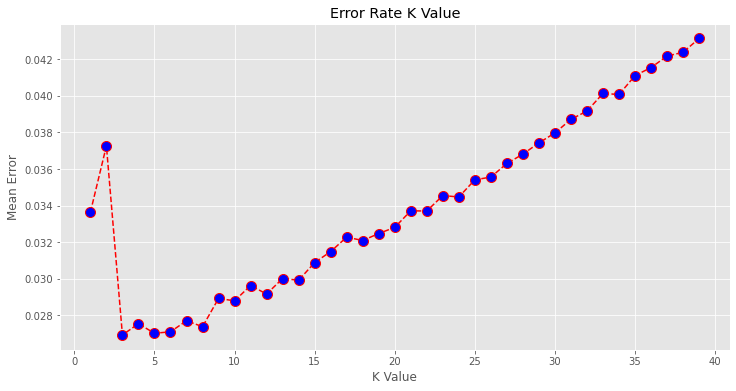

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [112]:
pred = knn.predict(x_train)
pred[:5]

array(['3 ROOM', '3 ROOM', '4 ROOM', '3 ROOM', '4 ROOM'], dtype=object)

In [113]:
#y_pred_prob = knn.predict_proba(x_test)
#y_pred_prob

In [114]:
y_pred = knn.predict(x_test)
a = sum(y_pred == y_test.values)
b = y_test.size
#accuracy
a/b

0.9729805013927577

In [115]:
y_pred = knn2.predict(x_test)
a = sum(y_pred == y_test.values)
b = y_test.size
#accuracy
a/b

0.9730733519034355

In [116]:
#confusion matrix since unequal no. of observation in each flat_type
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
#y-axis(true) =1 ROOM, 2 ROOM, 3 ROOM, 4 ROOM, 5 ROOM, EXECUTIVE, M.G.
#x-axis(predict) = 1 ROOM, 2 ROOM, 3 ROOM, 4 ROOM, 5 ROOM, EXECUTIVE, M.G.

array([[  234,    13,     1,     0,     0,     0,     0],
       [    3,  1148,    91,     0,     0,     0,     0],
       [    0,    35, 33056,   805,    16,    19,     1],
       [    0,     0,   552, 28773,   231,     0,     0],
       [    0,     0,     0,   126, 14095,   241,     0],
       [    0,     0,     1,     0,    89,  6528,    18],
       [    0,     0,     0,     0,    12,    66,     6]], dtype=int64)

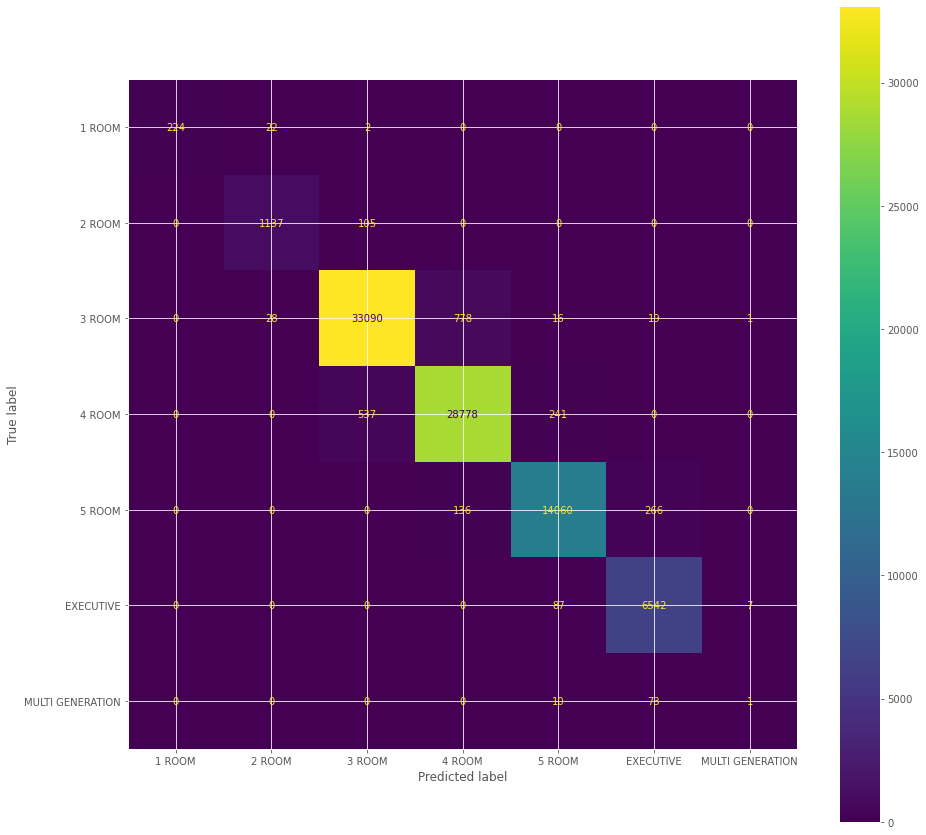

In [47]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(15, 15))

plot_confusion_matrix(knn, x_test, y_test, ax=ax);

In [48]:
# 3 room tend to be confused with 4 room.
# 4 room tend to be confused with 3 room and 5 room.
# 5 room tend to be confused with 4 room and executive. 

In [117]:
#K-fold Cross Validation
#data is divided into k parts, cross_val_score is ran k times, each time
#one of the k subset data will be used as test set, the others are combined
#and used as training data. Accuracy is averaged over k trials
# cv = k
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors = 3)
cv_scores1 = cross_val_score(knn_cv, x, y, cv = 10)
cv_scores1.mean()

0.9627402506963788

In [118]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors = 5)
cv_scores = cross_val_score(knn_cv, x, y, cv = 10)
cv_scores.mean()

0.9620369080779945

In [51]:
#Using Knn,its pretty accurate in determining flat_type
#based on resale price and floor_area_sqm.

#but what other components of the dataset can we use?
#We cant use pca, as pca is for numerical data and we only have 2 columns
#we can do decision tree, but prof haven't go through the lab.


In [121]:
#finding the best k, considering I assumed it as 5
from sklearn.model_selection import GridSearchCV
knnGS = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(2,10)}
knn_gscv = GridSearchCV(knnGS, param_grid, cv=10)
knn_gscv.fit(x,y)
knn_gscv.best_params_

{'n_neighbors': 3}